In [9]:
pip install pandas



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import warnings

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter('ignore', ConvergenceWarning)
%config InlineBackend.figure_format = 'retina'

#Import data
df = pd.read_csv('https://raw.githubusercontent.com/sattawat61/Thai-Baht-to-U.S.-Dollar-Spot-Exchange-Rate/main/dataset/DEXTHUS.csv', parse_dates = ['DATE'])
df = df.set_index('DATE')
df = df.rename(columns = {'DEXTHUS':'price'})

Text(0.5, 1.0, 'Thai Baht to U.S. Dollar Spot Exchange Rate ')

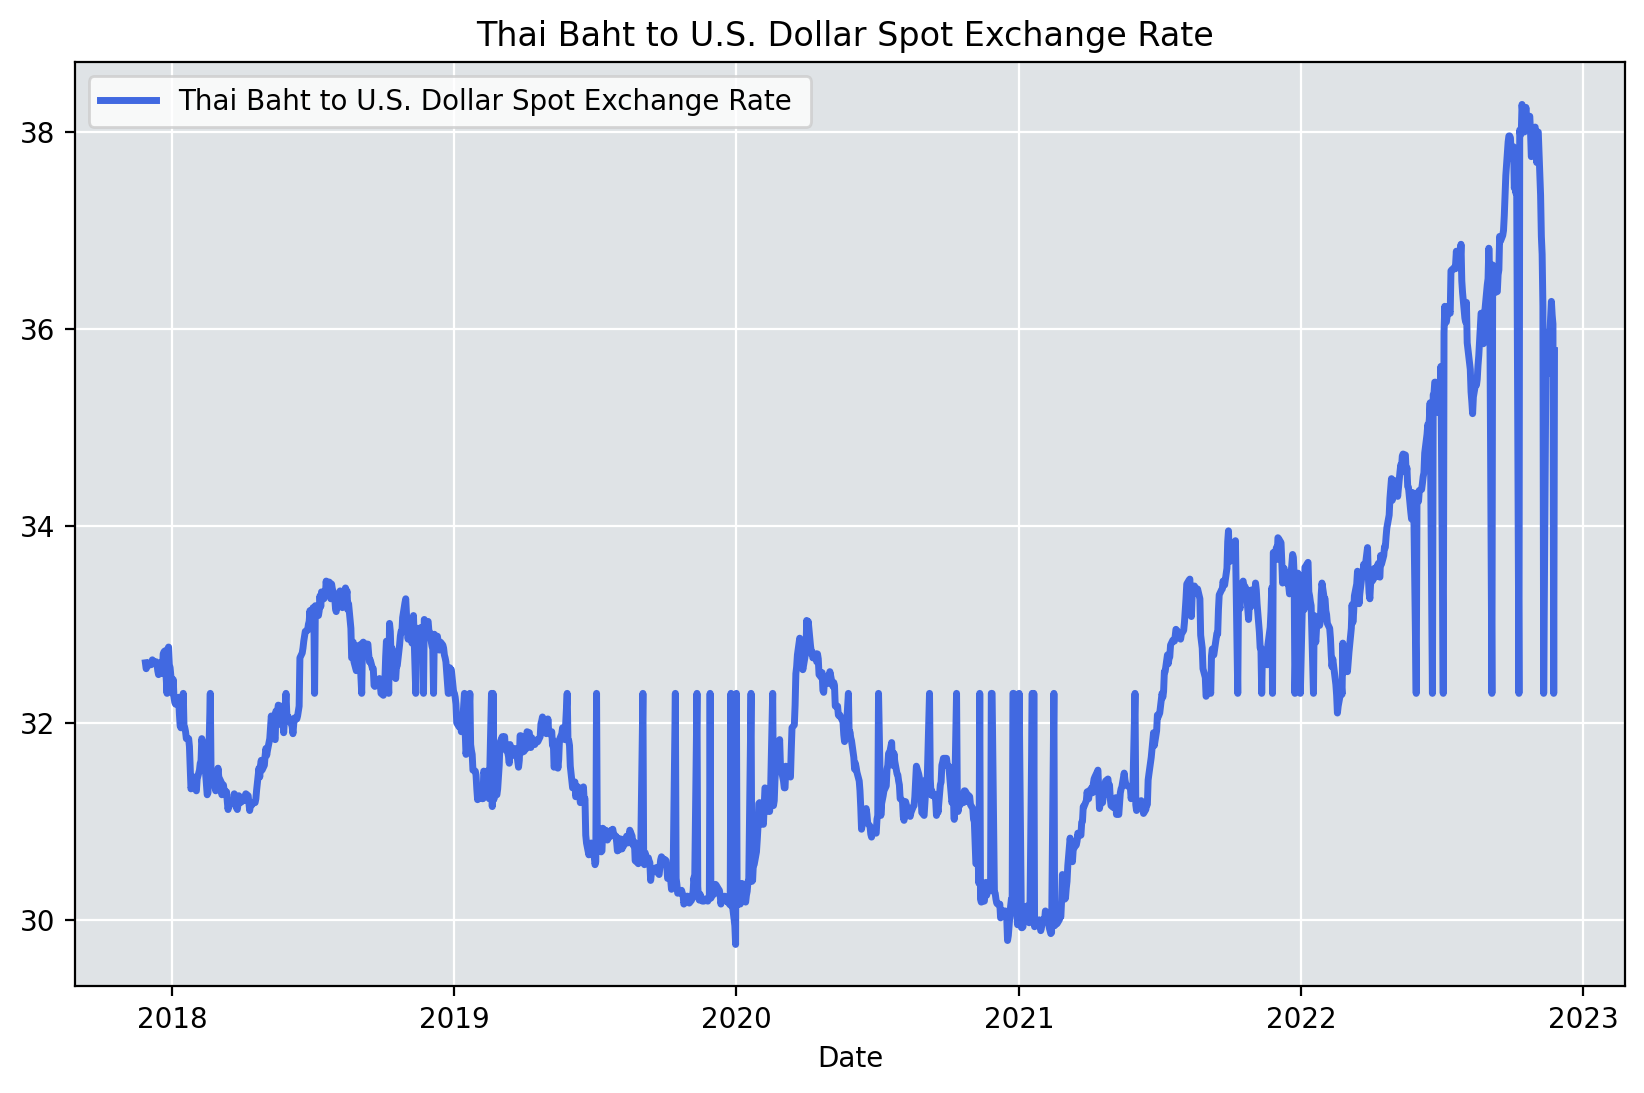

In [21]:
#Data assessment
df['price'] = df['price'].replace('.', np.nan)
df['price'] = df['price'].astype(np.float64)
df['price'] = df['price'].fillna(df['price'].mean())

#Plotting price
plt.figure(figsize = (10,6))
ax = plt.axes()
ax.set_facecolor('#dfe3e6')
plt.grid(color = 'w')
plt.plot(df['price'], c = 'royalblue', linewidth = 2.5, label = 'Thai Baht to U.S. Dollar Spot Exchange Rate ')
plt.xlabel('Date')
plt.legend()
plt.title('Thai Baht to U.S. Dollar Spot Exchange Rate ')

In [22]:
#Grid search parameters
p = d = q = range(0, 3) #pdq can be either 0 or 1 or 2
P = D = Q = range(0, 3) #PDQ can be either 0 or 1 or 2
seasonal = 7 #Define seasonal parameter (weekly)

#All possible combiantions
pdq = list(itertools.product(p, d, q))
PDQ = list(itertools.product(P, D, Q))
PDQS = [(a[0], a[1], a[2], seasonal) for a in PDQ] #With seasonal effect

In [23]:
#Grid search model
aic = None

for trends in pdq:
  for seasons in PDQS:
    model = SARIMAX(df['price'], order = trends, seasonal_order = seasons,
                    enforce_stationarity = False, enforce_invertibility = False, freq = 'B')
    model = model.fit()
    if aic is None:
      aic = model.aic
    elif aic > model.aic:
      aic = model.aic
      best_pdq = trends
      best_PDQS = seasons
      print(f'Lowest AIC: {aic}')
      print(f'Best p, d, q: {trends}')
      print(f'Best P, D, Q, S: {seasons}')
    else:
      continue

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


Lowest AIC: 10970.541920160407
Best p, d, q: (0, 0, 0)
Best P, D, Q, S: (0, 0, 1, 7)


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


Lowest AIC: 9361.919491745026
Best p, d, q: (0, 0, 0)
Best P, D, Q, S: (0, 0, 2, 7)
Lowest AIC: 2556.3865772518907
Best p, d, q: (0, 0, 0)
Best P, D, Q, S: (0, 1, 0, 7)
Lowest AIC: 2403.5578647680986
Best p, d, q: (0, 0, 0)
Best P, D, Q, S: (0, 1, 1, 7)


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


Lowest AIC: 2398.1732392941617
Best p, d, q: (0, 0, 0)
Best P, D, Q, S: (0, 1, 2, 7)


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-p

Lowest AIC: 2398.070542398364
Best p, d, q: (0, 0, 0)
Best P, D, Q, S: (2, 1, 0, 7)


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-p

Lowest AIC: 2217.389160675941
Best p, d, q: (0, 0, 1)
Best P, D, Q, S: (0, 1, 1, 7)
Lowest AIC: 2211.53481942236
Best p, d, q: (0, 0, 1)
Best P, D, Q, S: (0, 1, 2, 7)


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-p

Lowest AIC: 2107.306332198919
Best p, d, q: (0, 0, 2)
Best P, D, Q, S: (0, 1, 1, 7)


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


Lowest AIC: 2102.8837842191197
Best p, d, q: (0, 0, 2)
Best P, D, Q, S: (0, 1, 2, 7)


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-p

Lowest AIC: 1629.1390148866853
Best p, d, q: (0, 1, 1)
Best P, D, Q, S: (0, 0, 0, 7)


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


Lowest AIC: 1625.9255494580584
Best p, d, q: (0, 1, 1)
Best P, D, Q, S: (0, 0, 2, 7)


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-p